<p><h1><b><font color="DarkBlue">Group 3</p>

<p><h1><b><font color = 'DarkBlue'> Problem Statment </font></b></h1></p>
<p> The project is about on world's largest taxi company In this project, we're looking to predict the fare for their future transactional cases. The company delivers service to lakhs of customers daily.Now it becomes really important to manage their data properly to come up with new business ideas to get best results Eventually, it becomes really important to estimate the fare prices accurately.</p>



In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d
import seaborn as sns

import math
from math import sqrt

from numpy import absolute
from numpy import mean
from numpy import std

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
#Here we have used the files.upload() method to upload the CSV file from local machine to the Colab environment.
from google.colab import files
uploaded = files.upload()

Saving Data3_reg.csv to Data3_reg.csv


In [6]:
#Then used the io.BytesIO() method to read the file content as a bytes buffer, 
#which can be passed to the pd.read_csv() method to create a Pandas dataframe

import io
df = pd.read_csv(io.BytesIO(uploaded['Data3_reg.csv']), parse_dates=['pickup_datetime'])

In [7]:
#we print the first few rows of the dataframe using the df.head() method to confirm that the CSV file was imported correctly.

df.head()

,Unnamed: 0,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
0,33938191,20:00.0,2011-05-05 12:20:00+00:00,0.000000,0.000000,0.000000,0.000000,1,5.7
1,19914191,56:00.0,2013-09-21 02:56:00+00:00,-73.988922,40.718932,-74.001645,40.721342,4,5.5
2,27738228,06:34.0,2011-12-30 14:06:34+00:00,-73.979698,40.743742,-73.975179,40.747947,3,3.7
3,45259803,36:00.0,2010-08-07 12:36:00+00:00,-74.015798,40.717710,-74.003808,40.747497,3,10.1
4,14387198,19:41.0,2014-08-21 17:19:41+00:00,-73.967470,40.763028,-73.983574,40.743744,1,10.5


**The dataset contains the following fields :**
* key - a unique identifier for each trip
* fare_amount - the cost of each trip in usd
* pickup_datetime - date and time when the meter was engaged
* passenger_count - the number of passengers in the vehicle (driver entered value)
* pickup_longitude - the longitude where the meter was engaged
* pickup_latitude - the latitude where the meter was engaged
* dropoff_longitude - the longitude where the meter was disengaged
* dropoff_latitude - the latitude where the meter was disengaged

In [8]:
#droping the unnecessary columns

df.drop(['Unnamed: 0','key'],inplace=True,axis = 1)
df.dropna(axis=0,inplace=True)

**Numerical Variables :**
* pickup_datetime
* pickup_latitude
* pickup_longitude
* dropoff_latitude
* dropoff_longitude

**Categorical Variables :**
* passanger_count

**Target Variable :**
* fare_amount

In [9]:
#checking data for outliers
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pickup_longitude,119999.0,-72.542943,11.714026,-1340.648410,-73.992060,-73.981846,-73.967126,40.806012
pickup_latitude,119999.0,39.939603,7.745510,-74.015515,40.734781,40.752555,40.767193,1644.421482
dropoff_longitude,119999.0,-72.550497,14.053754,-3356.666300,-73.991428,-73.980128,-73.963653,40.828377
dropoff_latitude,119999.0,39.939267,6.687583,-74.015750,40.733797,40.753005,40.768045,872.697628
passenger_count,119999.0,1.684106,1.305724,0.000000,1.000000,1.000000,2.000000,6.000000
fare_amount,119999.0,11.331929,9.821714,-52.000000,6.000000,8.500000,12.500000,350.000000


We see the presence of **strange values** in the **max and min coordinates** and the **min fare amount**.

Also The valid range of latitude in degrees is -90 and +90 for the southern and northern hemisphere, respectively. Longitude is in the range -180 and +180 specifying coordinates west and east of the Prime Meridian, respectively. But we see Max and Min latitude and longitude in our data set near ±3000 - it's definitely a mistake.

<Axes: >

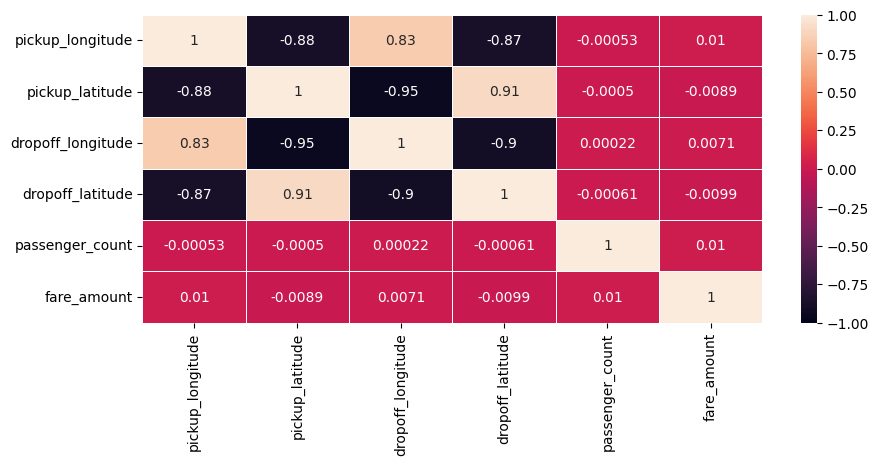

In [10]:
#Plotting HeatMap

plt.figure(figsize=(10,4))
sns.heatmap(df.corr(), annot=True, linewidths=.5, vmin = -1, vmax = 1, fmt = '.2g')

**High correlation can be observed between the geo-spatial data points, which was expected. Therefore, there is no need to drop any of the independent variables**

<p><h1><b><font color='DarkBlue'>Data Visualization</b></h1></p>

array([[<Axes: title={'center': 'pickup_datetime'}>,
        <Axes: title={'center': 'pickup_longitude'}>,
        <Axes: title={'center': 'pickup_latitude'}>],
       [<Axes: title={'center': 'dropoff_longitude'}>,
        <Axes: title={'center': 'dropoff_latitude'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'fare_amount'}>, <Axes: >, <Axes: >]],
      dtype=object)

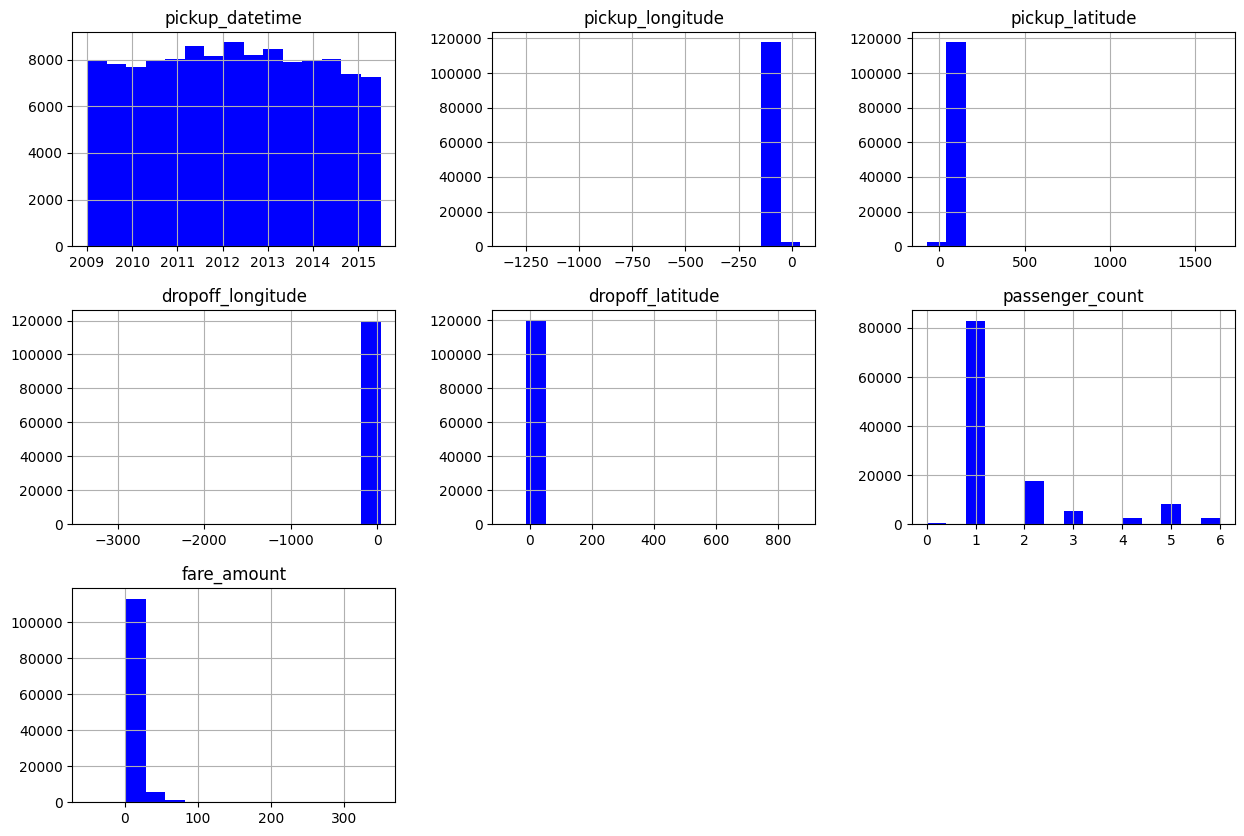

In [11]:
df.hist(bins=15, figsize=(15, 10),color='blue')

**Conclusions from the histplots:**

**1. fare_amount**

taking only positive trip costs and limit the maximum cost to $100 to eliminate possible outliers

**2. passenger_count**

taking only non-zero numbers of passengers (replace 0 by 1) and maximum count is 6

**3. Co-ordinates**

taking the Euclidean Distance from pickup, dropoff latitudes and longitudes

**4. pickup_datetime**

separating the 'pickup_datetime' column into different columns for 'year', 'month', 'day', 'day_of_week', and 'hour'

<p><h1><b><font color='darkblue'>Data Preprocessing</b></h1></p>

In [12]:
def preprocess(df): 
    # remove missing values in the dataframe
    def remove_missing_values(df):
        df = df.dropna()
        return df
    
    # remove outliers in fare amount 
    def remove_fare_amount_outliers(df, lower_bound, upper_bound):
        df = df[(df['fare_amount'] > lower_bound) & (df['fare_amount'] <= upper_bound)]
        return df
    
    # replace outliers in passenger count with the mode
    def replace_passenger_count_outliers(df):
        mode = df['passenger_count'].mode().values[0]
        df.loc[df['passenger_count'] == 0, 'passenger_count'] = 1
        return df
    
    #remove outliers in latitude and longitude
    def remove_lat_long_outliers(df):
        # range of longitude for NYC
        min_longitude = -180.0
        max_longitude = +180.0

        # range of latitude for NYC
        min_latitude = -90
        max_latitude = +90
        
        # only consider valid locations 
        for long in ['pickup_longitude', 'dropoff_longitude']:
            df = df[(df[long] > min_longitude) & (df[long] < max_longitude)]

        for lat in ['pickup_latitude', 'dropoff_latitude']:
            df = df[(df[lat] > min_latitude) & (df[lat] < max_latitude)]
        return df


    df = remove_missing_values(df)
    df = remove_fare_amount_outliers(df, lower_bound = 0, upper_bound = 100)
    df = replace_passenger_count_outliers(df)
    df = remove_lat_long_outliers(df)
    return df


In [13]:
df = preprocess(df)

In [14]:
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
0,2011-05-05 12:20:00+00:00,0.000000,0.000000,0.000000,0.000000,1,5.7
1,2013-09-21 02:56:00+00:00,-73.988922,40.718932,-74.001645,40.721342,4,5.5
2,2011-12-30 14:06:34+00:00,-73.979698,40.743742,-73.975179,40.747947,3,3.7
3,2010-08-07 12:36:00+00:00,-74.015798,40.717710,-74.003808,40.747497,3,10.1
4,2014-08-21 17:19:41+00:00,-73.967470,40.763028,-73.983574,40.743744,1,10.5


<p><h2><b>Feature Engineering</h2></p>

In [15]:
def feature_engineer(df):
    # create new columns for year, month, day, day of week and hour
    def create_time_features(df):
        df['year'] = df['pickup_datetime'].dt.year
        df['month'] = df['pickup_datetime'].dt.month
        df['day'] = df['pickup_datetime'].dt.day
        df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
        df['hour'] = df['pickup_datetime'].dt.hour
        df = df.drop(['pickup_datetime'], axis=1)
        return df

    # function to calculate euclidean distance
    def euc_distance(lat1, long1, lat2, long2):
        return(((lat1-lat2)**2 + (long1-long2)**2)**0.5)

    # create new column for the distance travelled
    def create_pickup_dropoff_dist_features(df):
        df['travel_distance'] = euc_distance(df['pickup_latitude'], df['pickup_longitude'], df['dropoff_latitude'], df['dropoff_longitude'])
        return df
    
    df = create_time_features(df)
    df = create_pickup_dropoff_dist_features(df)
    return df

In [16]:
df = feature_engineer(df)
df.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount,year,month,day,day_of_week,hour,travel_distance
0,0.000000,0.000000,0.000000,0.000000,1,5.7,2011,5,5,3,12,0.000000
1,-73.988922,40.718932,-74.001645,40.721342,4,5.5,2013,9,21,5,2,0.012949
2,-73.979698,40.743742,-73.975179,40.747947,3,3.7,2011,12,30,4,14,0.006173
3,-74.015798,40.717710,-74.003808,40.747497,3,10.1,2010,8,7,5,12,0.032110
4,-73.967470,40.763028,-73.983574,40.743744,1,10.5,2014,8,21,3,17,0.025124


**Droping the columns which are not required**
* Dropping the columns 'pickup datetime' and 'pickup hour' as we have extracted relvant pieces of information
* As well as pickup and dropoff coordinates are not required as we have the required data extracted from them

In [17]:
df = df.drop(['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude'],axis=1)
df.head()

,passenger_count,fare_amount,year,month,day,day_of_week,hour,travel_distance
0,1,5.7,2011,5,5,3,12,0.000000
1,4,5.5,2013,9,21,5,2,0.012949
2,3,3.7,2011,12,30,4,14,0.006173
3,3,10.1,2010,8,7,5,12,0.032110
4,1,10.5,2014,8,21,3,17,0.025124


<p><h2><b>Data Analysis</b></h2></p>

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '5'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '6')])

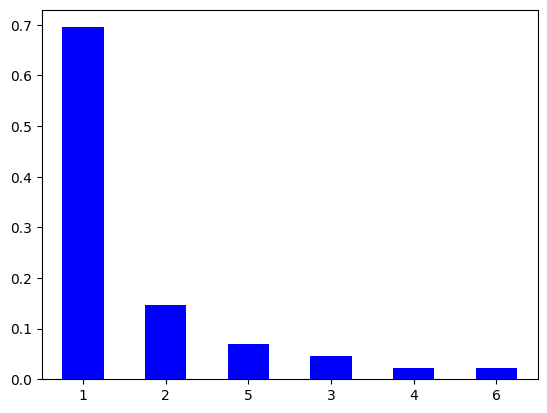

In [18]:
df['passenger_count'].value_counts(normalize = True).plot.bar(color='blue')
plt.xticks(rotation = 0)

**Observation :**

Almost 70% of trips had only 1 passanger

Text(0.5, 1.0, 'Number of trips vs hours')

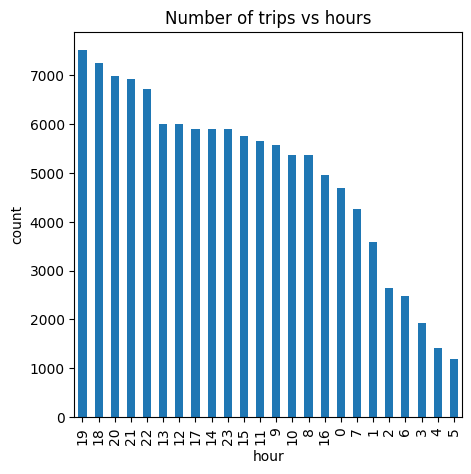

In [19]:
hour=df['hour'].value_counts()
hour.plot(kind='bar',figsize=(5,5))
plt.xlabel('hour')
plt.ylabel('count')
plt.title('Number of trips vs hours')

**Observation:**

As expected, the number of trips are low during 1am - 6am, and peak between 7pm - 9pm

We can clearly see that during weekdays, peak hours are during the day while on weekends, peak hours are late in the night

Text(0.5, 1.0, 'Number of trips vs weekdays')

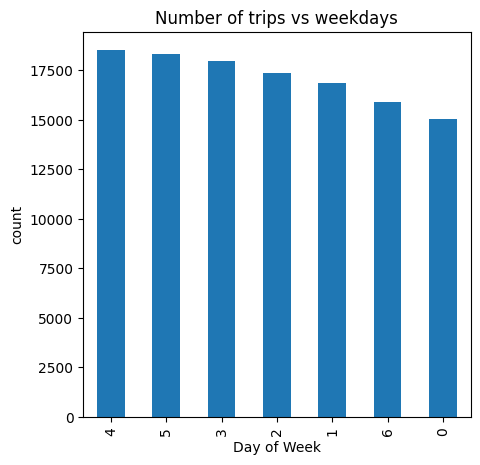

In [20]:
DayWeek=df['day_of_week'].value_counts()
DayWeek.plot(kind='bar',figsize=(5,5))
plt.xlabel('Day of Week')
plt.ylabel('count')
plt.title('Number of trips vs weekdays')

**Observation:**

As expected, Friday (weekend eve) and Saturday had the highest number of trips

<Axes: xlabel='travel_distance', ylabel='fare_amount'>

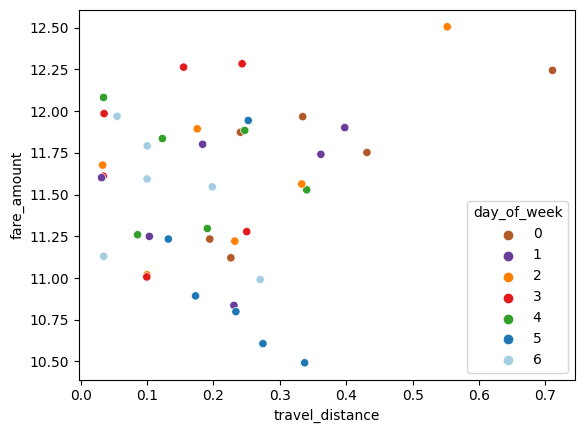

In [21]:
table = pd.pivot_table(data=df,index=['passenger_count','day_of_week'],values=['travel_distance','fare_amount'])
table
sns.scatterplot(data=table, x="travel_distance", y="fare_amount",hue='day_of_week', palette='Paired_r')

**Observation :**

Generally, as distance increases, the fare amount also increases with a few sporadic inconsistencies

array([[<Axes: title={'center': 'passenger_count'}>,
        <Axes: title={'center': 'fare_amount'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'day_of_week'}>],
       [<Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'travel_distance'}>, <Axes: >]],
      dtype=object)

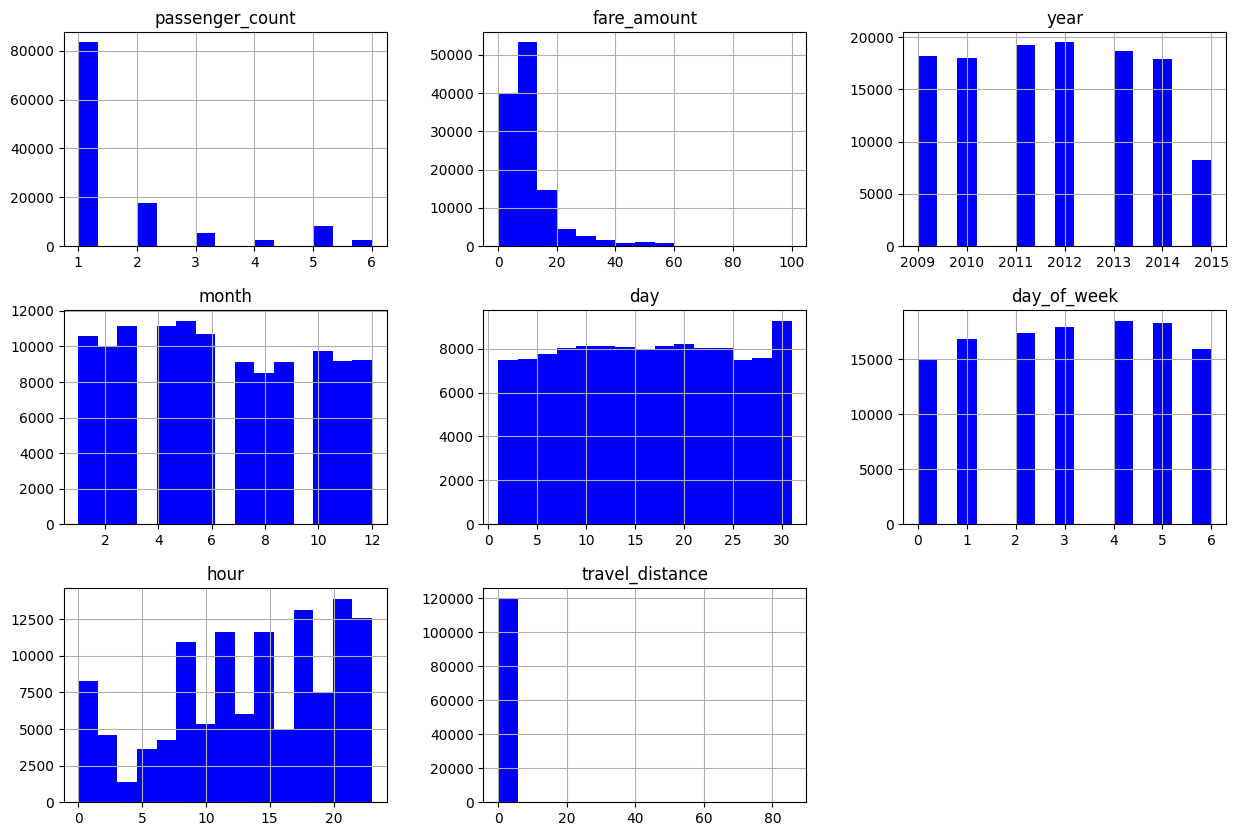

In [22]:
df.hist(bins=15, figsize=(15, 10),color='blue')

<p><h1><b><font color='Darkblue'>Scaling</b></h1></p>

Feature Scaling is required because of two reasons:

* The data points are far from each other. This means that in some columns, the distance between data points is a lot
* Some of the features have a unit while other features are unitless. Therefore, it is important to make all features unitless

In [23]:
# Scale the features
df_prescaled = df.copy()
df_scaled = df.drop(['fare_amount'], axis = 1)
df_scaled = scale(df_scaled)
cols = df.columns.tolist()
cols.remove('fare_amount')
df_scaled = pd.DataFrame(df_scaled, columns = cols, index = df.index)
df_scaled = pd.concat([df_scaled, df['fare_amount']], axis = 1)
df = df_scaled.copy()

In [24]:
# Split the dataframe into a training and testing set
X = df.loc[:, df.columns != 'fare_amount'] 
y = df.fare_amount
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [25]:
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(95941, 7)
(95941,)
(23986, 7)
(23986,)


<p><h1><b><font color='DarkBlue'>Model Creation</b></h></p>

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from sklearn.metrics import mean_squared_error
from keras.layers import Dropout

In [48]:
learning_rate = 0.001

# Creating model using the Sequential in tensorflow
#model creation

model_D = keras.models.Sequential([
 keras.layers.Dense(units=160,kernel_initializer='normal', activation='relu',input_dim=X_train.shape[1]),
 Dropout(0.2),
 keras.layers.Dense(units=480,kernel_initializer='normal', activation='relu'),
 Dropout(0.2),
 keras.layers.Dense(units=256,kernel_initializer='normal', activation='relu'),
 keras.layers.Dense(units=1,kernel_initializer='normal', activation='linear')])

In [28]:
model_D.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               1280      
                                                                 
 dropout (Dropout)           (None, 160)               0         
                                                                 
 dense_1 (Dense)             (None, 480)               77280     
                                                                 
 dropout_1 (Dropout)         (None, 480)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               123136    
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 201,953
Trainable params: 201,953
Non-trai

In [29]:
from keras.losses import MeanSquaredLogarithmicError
from keras.optimizers import Adam
msle = MeanSquaredLogarithmicError()

In [52]:
#model compilation

model_D.compile(loss=msle, optimizer=Adam(learning_rate=learning_rate), metrics=['mse'])

In [53]:
#fitting the model

history = model_D.fit(X_train,y_train, epochs=10, batch_size=512,validation_split=0.3)

Epoch 1/10
132/132 [==============================] - 5s 30ms/step - loss: 0.2811 - mse: 88.3390 - val_loss: 0.2721 - val_mse: 85.3350
Epoch 2/10
132/132 [==============================] - 4s 28ms/step - loss: 0.2640 - mse: 84.7310 - val_loss: 0.2380 - val_mse: 78.0017
Epoch 3/10
132/132 [==============================] - 5s 36ms/step - loss: 0.2186 - mse: 74.1287 - val_loss: 0.1575 - val_mse: 62.9677
Epoch 4/10
132/132 [==============================] - 3s 26ms/step - loss: 0.1563 - mse: 55.9255 - val_loss: 0.1192 - val_mse: 48.2480
Epoch 5/10
132/132 [==============================] - 4s 27ms/step - loss: 0.1126 - mse: 38.6895 - val_loss: 0.0913 - val_mse: 32.9313
Epoch 6/10
132/132 [==============================] - 4s 33ms/step - loss: 0.0990 - mse: 32.2280 - val_loss: 0.0878 - val_mse: 30.6739
Epoch 7/10
132/132 [==============================] - 4s 29ms/step - loss: 0.0934 - mse: 29.5245 - val_loss: 0.0816 - val_mse: 27.0925
Epoch 8/10
132/132 [==============================] - 4

In [54]:
# from keras.utils.vis_utils import plot_model
# plot_model(model_D, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

<p><h2><b><font color= 'DarkBlue'>Results</b></h2></p>

In [55]:
# Results
train_pred = model_D.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
test_pred = model_D.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

from sklearn.metrics import r2_score
train_r2_Score = r2_score(y_train,train_pred) 
print("Train R2 Score: {:0.2f}".format(train_r2_Score))

test_r2_Score = r2_score(y_test,test_pred) 
print("Test R2 Score: {:0.2f}".format(test_r2_Score))

print("Train RMSE: {:0.2f}".format(train_rmse))
print("Test RMSE: {:0.2f}".format(test_rmse))

750/750 [==============================] - 2s 3ms/step
Train R2 Score: 0.72
Test R2 Score: 0.73
Train RMSE: 4.96
Test RMSE: 4.97


<p><h1><b><font color='Darkblue'>Prediction</b></h1></p>

In [34]:
def predict_random(df_prescaled, X_test, model):
    sample = X_test.sample(n = 1, random_state = np.random.randint(low = 0, high = 10000))
    idx = sample.index[0]

    actual_fare = df_prescaled.loc[idx,'fare_amount']
    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day_of_week = day_names[df_prescaled.loc[idx,'day_of_week']]
    hour = df_prescaled.loc[idx,'hour']
    predicted_fare = model.predict(sample)[0][0]
    rmse = np.sqrt(np.square(predicted_fare - actual_fare))

    print("Trip Details: {}, {}:00hrs".format(day_of_week, hour))  
    print("Actual fare: ${:0.2f}".format(actual_fare))
    print("Predicted fare: ${:0.2f}".format(predicted_fare))
    print("RMSE: ${:0.2f}".format(rmse))

predict_random(df_prescaled, X_test, model_D)

1/1 [==============================] - 0s 27ms/step
Trip Details: Tuesday, 12:00hrs
Actual fare: $8.50
Predicted fare: $8.75
RMSE: $0.25


**=============================================================================================================**